In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import os
import pandas as pd

In [3]:
path = '/content/gdrive/MyDrive/TugasGWR/'

os.listdir(path)

['quads.shp',
 'streams.shp',
 'quads.dbf',
 'quads.shx',
 'landslides.csv',
 'streams.dbf',
 'streams.shx']

In [4]:
pip install numpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
pip install pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [7]:
pip install libpysal

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 57.3 MB/s eta 0:00:00


In [8]:
pip install mgwr

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.8/41.8 kB 3.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 220.2/220.2 kB 19.2 MB/s eta 0:00:00
  Created wheel for mgwr: filename=mgwr-2.1.2-py3-none-any.whl size=46365 sha256=8c5cae7fd55a61dfa1f4746c3f63702bf4108149dae8424acf9e5da94678f567
  Stored in directory: /root/.cache/pip/wheels/4d/43/6e/bd2d0e1ccee77089e0b266ebc4948d9a90ef363e0be23663aa
  Created wheel for spglm: filename=spglm-1.0.8-py3-none-any.whl size=38785 sha256=17d66aa30786d792e5a4a710e5e8a77f7cb3366d7efce5a55c68b3e5ae4a69eb
  Stored in directory: /root/.cache/pip/wheels/a2/a7/67/07d6d6809173d768c16235f813520d6a4053984a160aa933fa
Successfully built mgwr spglm


In [9]:
pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 29.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 65.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 65.9 MB/s eta 0:00:00


In [10]:
# Install semua library yang dibutuhkan: numpy, matplotlib, pandas, mgwr, geopandas dan libpysal
# Gunakan perintah: pip install libpysal (sebagai contoh)
import numpy as np
import libpysal as ps
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import geopandas as gp

from mgwr.gwr import GWR, MGWR
from mgwr.sel_bw import Sel_BW

<Axes: >

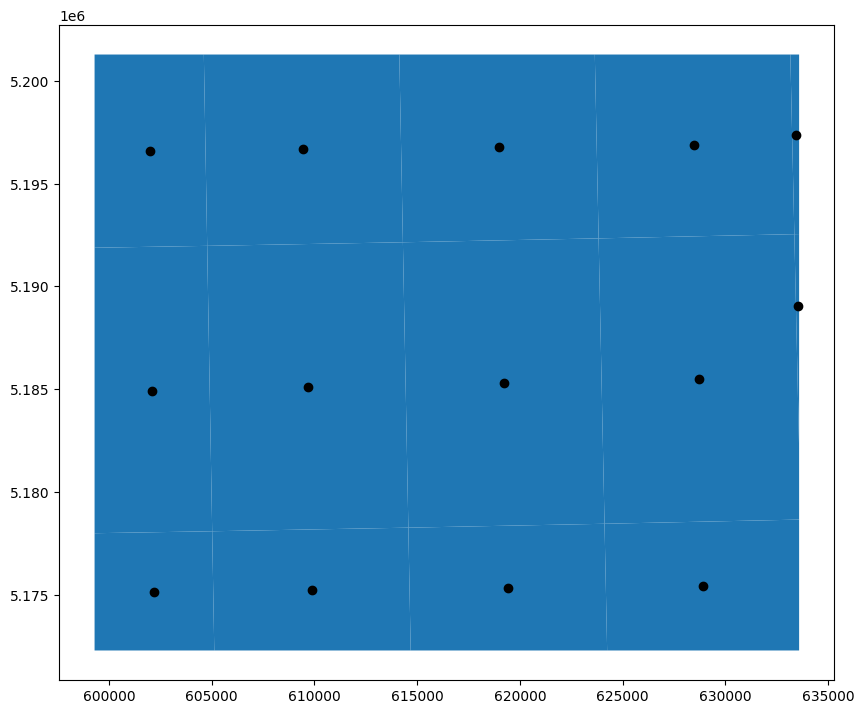

In [22]:
#Load dataset and generate plot  (figure 1)
df= pd.read_csv(path + 'landslides.csv')
#shp = gp.read_file(path + 'streams.shp')
shp = gp.read_file(path + 'quads.shp')
fig, ax = plt.subplots(figsize=(10,10))
shp.plot(ax=ax)
shp.centroid.plot(ax=ax, c='black')

In [17]:
# Tentukan variabel bebas dan terikatnya
g_y = df['Landslid'].values.reshape((-1,1))
g_X = df[['Elev', 'Slope', 'SinAspct','CosAspct','AbsSouth','DistStrm']].values
# Tentukan Latitude dan Longitude
u = df['X']
v = df['Y']
g_coords = list(zip(u,v))

g_X = (g_X - g_X.mean(axis=0)) / g_X.std(axis=0)

g_y = g_y.reshape((-1,1))

g_y = (g_y - g_y.mean(axis=0)) / g_y.std(axis=0)

In [18]:
# Kalibrate GWR model
gwr_selector = Sel_BW(g_coords, g_y, g_X)
gwr_bw = gwr_selector.search(bw_min=2)
print(gwr_bw)
gwr_results = GWR(g_coords, g_y, g_X, gwr_bw).fit()

171.0


In [24]:
gwr_results.params[0:239]

array([[ 0.13599814, -0.21753686,  0.06699391, ..., -0.11119288,
         0.00794546, -0.15679158],
       [ 0.19343182, -0.23206473,  0.06701515, ..., -0.44782221,
         0.33342506, -0.17720392],
       [ 0.13622303, -0.22411548,  0.07358568, ..., -0.05420387,
        -0.03800553, -0.13873459],
       ...,
       [-0.01634885, -0.40335449,  0.14956533, ..., -0.34607087,
         0.21437974, -0.06589473],
       [ 0.19188764, -0.25643392,  0.0840639 , ..., -0.40127305,
         0.32438619, -0.09142494],
       [ 0.19577724, -0.23738437,  0.11221914, ..., -0.16773571,
         0.14755688,  0.03803814]])

In [28]:
gwr_results.localR2[0:239]

array([[0.1749662 ],
       [0.17733816],
       [0.17327434],
       [0.17785548],
       [0.16106696],
       [0.18122992],
       [0.15308144],
       [0.16153381],
       [0.15853776],
       [0.15814235],
       [0.13779293],
       [0.13727354],
       [0.14032367],
       [0.14035225],
       [0.27545568],
       [0.25005267],
       [0.14891246],
       [0.12187105],
       [0.15857165],
       [0.32696775],
       [0.39582894],
       [0.20247537],
       [0.35008581],
       [0.34384361],
       [0.1342881 ],
       [0.13902339],
       [0.16696318],
       [0.35313317],
       [0.30317503],
       [0.15823501],
       [0.35378741],
       [0.30193769],
       [0.26731568],
       [0.25458678],
       [0.25374889],
       [0.23906734],
       [0.32504106],
       [0.29538141],
       [0.32451765],
       [0.37297987],
       [0.30145274],
       [0.30346603],
       [0.33738805],
       [0.34232164],
       [0.33887889],
       [0.34671767],
       [0.34021038],
       [0.334

In [21]:
gwr_results.summary()

Model type                                                         Gaussian
Number of observations:                                                 239
Number of covariates:                                                     7

Global Regression Results
---------------------------------------------------------------------------
Residual sum of squares:                                            185.119
Log-likelihood:                                                    -308.598
AIC:                                                                631.197
AICc:                                                               633.823
BIC:                                                              -1085.420
R2:                                                                   0.225
Adj. R2:                                                              0.205

Variable                              Est.         SE  t(Est/SE)    p-value
------------------------------- ---------- ---------- ------